#The Impacts of Household Income on Kindergarten Education Outcomes
By: Bonnie Yam

In [46]:
#import the necessary libraries for data processing, visualizations, and statistical tests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat
from statsmodels.graphics.factorplots import interaction_plot
%pip install dfply
from dfply import *
%pip install pingouin
from pingouin import ancova

In [47]:
#load the dataset about kindergarten (1998-1999) subject scores
scores_data = pd.read_csv('INF2178_A3_data.csv')

#rename the columns of the 'scores_data' DataFrame
scores_data.columns = ['Fall_Reading_Score', 'Fall_Math_Score', 'Fall_General_Knowledge_Score', 'Spring_Reading_Score', 'Spring_Math_Score', 'Spring_General_Knowledge_Score',
                       'Household_Income', 'Household_Income_in_Thousands', 'Income_Group']

#rename the types of income groups
scores_data['Income_Group'] = np.where(scores_data['Income_Group'] == 1, 'Low', scores_data['Income_Group'])
scores_data['Income_Group'] = np.where(scores_data['Income_Group'] == '2', 'Middle', scores_data['Income_Group'])
scores_data['Income_Group'] = np.where(scores_data['Income_Group'] == '3', 'High', scores_data['Income_Group'])

#display the first 10 rows of the 'scores_data' DataFrame
scores_data.head(10)

,Fall_Reading_Score,Fall_Math_Score,Fall_General_Knowledge_Score,Spring_Reading_Score,Spring_Math_Score,Spring_General_Knowledge_Score,Household_Income,Household_Income_in_Thousands,Income_Group
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,High
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,High
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,High
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,Middle
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,Middle
5,50.45,36.27,33.352,64.13,53.31,32.703,150000.0,150.0,High
6,32.49,20.82,26.211,38.52,29.09,29.612,42000.0,42.0,Middle
7,33.30,26.85,27.072,36.72,32.22,33.730,70000.0,70.0,High
8,65.92,47.36,33.514,84.61,59.89,42.359,100000.0,100.0,High
9,34.20,22.27,28.096,39.87,27.44,32.374,78000.0,78.0,High


In [48]:
#display information about the 'scores_data' DataFrame
scores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Fall_Reading_Score              11933 non-null  float64
 1   Fall_Math_Score                 11933 non-null  float64
 2   Fall_General_Knowledge_Score    11933 non-null  float64
 3   Spring_Reading_Score            11933 non-null  float64
 4   Spring_Math_Score               11933 non-null  float64
 5   Spring_General_Knowledge_Score  11933 non-null  float64
 6   Household_Income                11933 non-null  float64
 7   Household_Income_in_Thousands   11933 non-null  float64
 8   Income_Group                    11933 non-null  object 
dtypes: float64(8), object(1)
memory usage: 839.2+ KB


In [49]:
#find the number of people, minimum income, maximum income in each income group
scores_data >> group_by(X.Income_Group) >> summarize(n = X['Household_Income'].count(), min = X['Household_Income'].min(), max = X['Household_Income'].max())

,Income_Group,n,min,max
0,High,3478,70000.0,150000.0
1,Low,4729,1.0,39800.0
2,Middle,3726,40000.0,69700.0


##Reading Scores

In [50]:
#get columns "Income_Group", "Fall_Reading_Score", and "Spring_Reading_Score"
#then reshape the data suitable for statsmodels package and save it as a DataFrame "reading_scores_data"
reading_scores_data = pd.melt(scores_data, id_vars=['Income_Group'], var_name = 'Season', value_vars=['Fall_Reading_Score', 'Spring_Reading_Score'], value_name = 'Score')

#rename the types of seasons in the 'reading_scores_data' DataFrame
reading_scores_data['Season'] = np.where(reading_scores_data['Season'] == 'Fall_Reading_Score', 'Fall 1998', reading_scores_data['Season'])
reading_scores_data['Season'] = np.where(reading_scores_data['Season'] == 'Spring_Reading_Score', 'Spring 1999', reading_scores_data['Season'])

reading_scores_data

,Income_Group,Season,Score
0,High,Fall 1998,36.58
1,High,Fall 1998,50.82
2,High,Fall 1998,40.68
3,Middle,Fall 1998,32.57
4,Middle,Fall 1998,31.98
...,...,...,...
23861,Low,Spring 1999,45.63
23862,Low,Spring 1999,47.84
23863,Middle,Spring 1999,49.93
23864,Low,Spring 1999,51.60


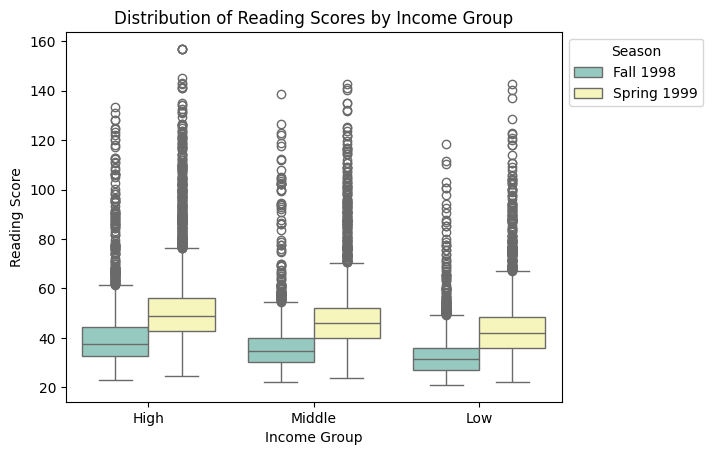

In [51]:
#visualize the distribution of reading scores by income group in a boxplot
sns.boxplot(x = 'Income_Group', y = 'Score', hue = 'Season', data = reading_scores_data, palette = 'Set3')

#set plot title
plt.title("Distribution of Reading Scores by Income Group")

#set x-axis label
plt.xlabel('Income Group')
#set y-axis label
plt.ylabel('Reading Score')

#rename the legend title and move the legend outside the graph
plt.legend(title = 'Season', bbox_to_anchor = (1, 1)) #(reference 1)

#References:
#Matplotlib.pyplot.legend()in Python: Python Matplotlib.pyplot.legend() Syntax. (2024, January 10). GeeksforGeeks. https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/?ref=header_search

In [52]:
#display summary statistics for dependent variable Spring_Reading_Score
print("Spring Reading Score Summary Statistics")
scores_data >> group_by(X.Income_Group) >> summarize(mean = X['Spring_Reading_Score'].mean(), std = X['Spring_Reading_Score'].std(),
                                                     min = X['Spring_Reading_Score'].min(), max = X['Spring_Reading_Score'].max(), q1 = X['Spring_Reading_Score'].quantile(0.25),
                                                     median = X['Spring_Reading_Score'].median(), q3 = X['Spring_Reading_Score'].quantile(0.75),
                                                     IQR = X['Spring_Reading_Score'].quantile(0.75) - X['Spring_Reading_Score'].quantile(0.25))

Spring Reading Score Summary Statistics


,Income_Group,mean,std,min,max,q1,median,q3,IQR
0,High,52.206880,16.450153,24.54,156.85,42.7800,48.740,56.2375,13.4575
1,Low,43.665077,12.004821,22.35,142.49,36.1000,41.970,48.5300,12.4300
2,Middle,48.009450,13.505020,23.93,142.49,39.8725,46.065,52.1675,12.2950


In [53]:
#display summary statistics for the control variable Fall_Reading_Score
print("Fall Reading Score Summary Statistics")
scores_data >> group_by(X.Income_Group) >> summarize(mean = X['Fall_Reading_Score'].mean(), std = X['Fall_Reading_Score'].std(),
                                                     min = X['Fall_Reading_Score'].min(), max = X['Fall_Reading_Score'].max(), q1 = X['Fall_Reading_Score'].quantile(0.25),
                                                     median = X['Fall_Reading_Score'].median(), q3 = X['Fall_Reading_Score'].quantile(0.75),
                                                     IQR = X['Fall_Reading_Score'].quantile(0.75) - X['Fall_Reading_Score'].quantile(0.25))

Fall Reading Score Summary Statistics


,Income_Group,mean,std,min,max,q1,median,q3,IQR
0,High,39.898493,12.289081,23.01,133.56,32.7800,37.575,44.23,11.4500
1,Low,32.786798,8.092492,21.01,118.29,27.1000,31.660,36.05,8.9500
2,Middle,36.292517,9.994213,22.19,138.51,30.2725,34.530,40.00,9.7275


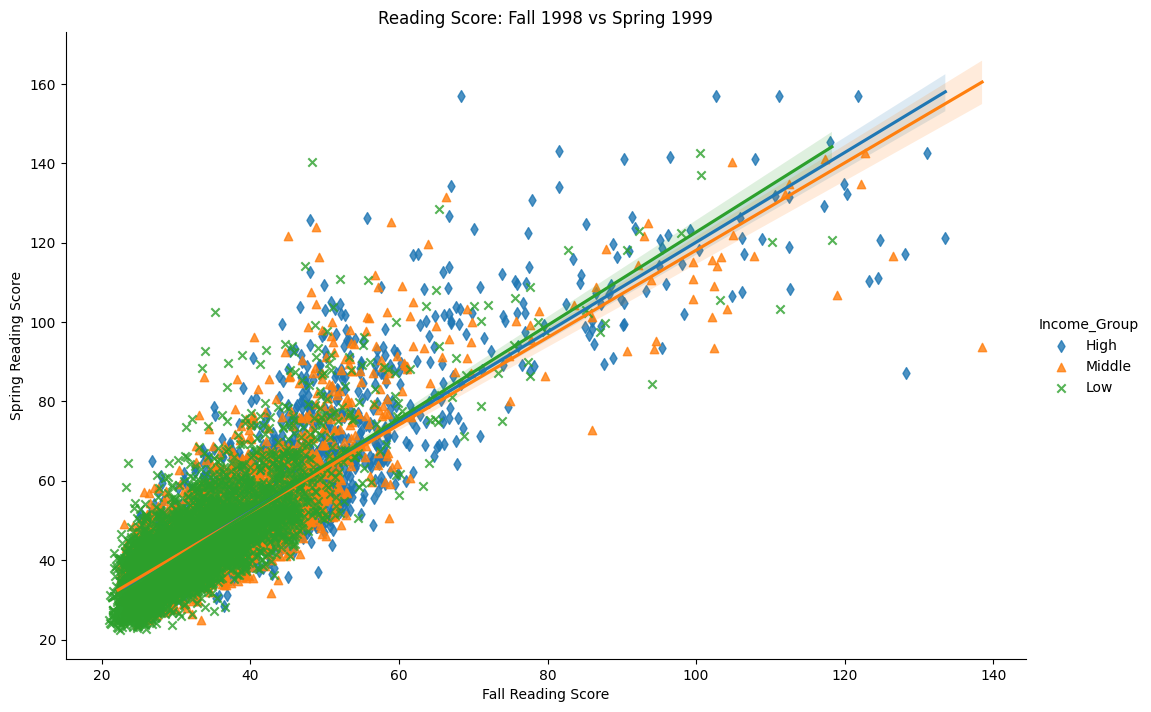

In [54]:
#create a scatterplot of fall reading scores vs spring reading scores for each income group
sns.lmplot(x = 'Fall_Reading_Score', y = "Spring_Reading_Score", hue = "Income_Group", height = 7, aspect = 1.5,
           data = scores_data, markers = ['d', '^', 'x']) #(reference 1)

#set plot title
plt.title('Reading Score: Fall 1998 vs Spring 1999')

#set x-axis label
plt.xlabel('Fall Reading Score')
#set y-axis label
plt.ylabel('Spring Reading Score')

plt.show()

#References:
#seaborn.lmport (n.d.) Seaborn. https://seaborn.pydata.org/generated/seaborn.lmplot.html

In [55]:
#perform one-way ANCOVA with Spring_Reading_Score as the dependent variable, Fall_Reading_Score as the covariate, and Income_Group as the categorical independent variable
ancova(data = scores_data, dv = 'Spring_Reading_Score', covar = 'Fall_Reading_Score', between = 'Income_Group')

,Source,SS,DF,F,p-unc,np2
0,Income_Group,5.131201e+02,2,4.055660,0.017348,0.00068
1,Fall_Reading_Score,1.547042e+06,1,24455.397576,0.000000,0.67214
2,Residual,7.546256e+05,11929,NaN,NaN,NaN


In [56]:
#Fit ANCOVA model with interaction term for reading scores
reading_model = sm.formula.ols('Spring_Reading_Score ~ Income_Group * Fall_Reading_Score', data = scores_data).fit()
#print the summary of the model
print(reading_model.summary())

                             OLS Regression Results                             
Dep. Variable:     Spring_Reading_Score   R-squared:                       0.692
Model:                              OLS   Adj. R-squared:                  0.692
Method:                   Least Squares   F-statistic:                     5367.
Date:                  Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                          20:41:02   Log-Likelihood:                -41667.
No. Observations:                 11933   AIC:                         8.335e+04
Df Residuals:                     11927   BIC:                         8.339e+04
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [57]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test

#conduct Shapiro-Wilk test to check if the residuals are normally distributed
t_stat, p_value = stats.shapiro(reading_model.resid)

#print the test statistic and p-value
print("test statistic = " + str(t_stat))
print("p-value = " + str(p_value))

test statistic = 0.9124301075935364
p-value = 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [58]:
#assumption 2: variances are homogenous
#conduct Levene's test
res = stat()
res.levene(df = scores_data, res_var = 'Spring_Reading_Score', xfac_var = 'Income_Group')
res.levene_summary

,Parameter,Value
0,Test statistics (W),39.5528
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


##Math Scores

In [59]:
#get columns "Income_Group", "Fall_Math_Score", and "Spring_Math_Score"
#then reshape the data suitable for statsmodels package and save it as a DataFrame "math_scores_data"
math_scores_data = pd.melt(scores_data, id_vars=['Income_Group'], var_name = 'Season', value_vars=['Fall_Math_Score', 'Spring_Math_Score'], value_name = 'Score')

#rename the types of seasons in the 'math_scores_data' DataFrame
math_scores_data['Season'] = np.where(math_scores_data['Season'] == 'Fall_Math_Score', 'Fall 1998', math_scores_data['Season'])
math_scores_data['Season'] = np.where(math_scores_data['Season'] == 'Spring_Math_Score', 'Spring 1999', math_scores_data['Season'])

math_scores_data

,Income_Group,Season,Score
0,High,Fall 1998,39.54
1,High,Fall 1998,44.44
2,High,Fall 1998,28.57
3,Middle,Fall 1998,23.57
4,Middle,Fall 1998,19.65
...,...,...,...
23861,Low,Spring 1999,24.27
23862,Low,Spring 1999,40.35
23863,Middle,Spring 1999,41.00
23864,Low,Spring 1999,50.27


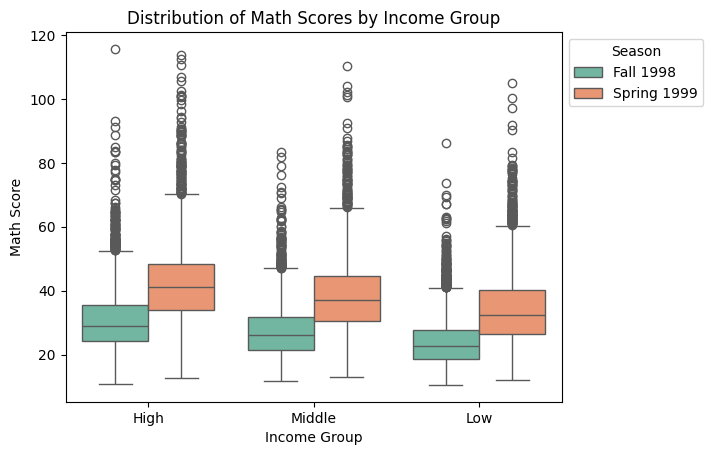

In [60]:
#visualize the distribution of math scores by income group in a boxplot
sns.boxplot(x = 'Income_Group', y = 'Score', hue = 'Season', data = math_scores_data, palette = 'Set2')

#set plot title
plt.title("Distribution of Math Scores by Income Group")

#set x-axis label
plt.xlabel('Income Group')
#set y-axis label
plt.ylabel('Math Score')

#rename the legend title and move the legend outside the graph
plt.legend(title = 'Season', bbox_to_anchor = (1, 1)) #(reference 1)

#References:
#Matplotlib.pyplot.legend()in Python: Python Matplotlib.pyplot.legend() Syntax. (2024, January 10). GeeksforGeeks. https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/?ref=header_search

In [61]:
#display summary statistics for dependent variable Spring_Math_Score
print("Spring Math Score Summary Statistics")
scores_data >> group_by(X.Income_Group) >> summarize(mean = X['Spring_Math_Score'].mean(), std = X['Spring_Math_Score'].std(),
                                                     min = X['Spring_Math_Score'].min(), max = X['Spring_Math_Score'].max(), q1 = X['Spring_Math_Score'].quantile(0.25),
                                                     median = X['Spring_Math_Score'].median(), q3 = X['Spring_Math_Score'].quantile(0.75),
                                                     IQR = X['Spring_Math_Score'].quantile(0.75) - X['Spring_Math_Score'].quantile(0.25))

Spring Math Score Summary Statistics


,Income_Group,mean,std,min,max,q1,median,q3,IQR
0,High,42.411898,12.605759,12.70,113.80,33.8450,41.030,48.4600,14.615
1,Low,33.883051,10.734653,11.90,105.06,26.4100,32.270,40.1000,13.690
2,Middle,38.464691,11.359349,13.14,110.33,30.3925,37.035,44.6975,14.305


In [62]:
#display summary statistics for control variable Fall_Math_Score
print("Fall Math Score Summary Statistics")
scores_data >> group_by(X.Income_Group) >> summarize(mean = X['Fall_Math_Score'].mean(), std = X['Fall_Math_Score'].std(),
                                                     min = X['Fall_Math_Score'].min(), max = X['Fall_Math_Score'].max(), q1 = X['Fall_Math_Score'].quantile(0.25),
                                                     median = X['Fall_Math_Score'].median(), q3 = X['Fall_Math_Score'].quantile(0.75),
                                                     IQR = X['Fall_Math_Score'].quantile(0.75) - X['Fall_Math_Score'].quantile(0.25))

Fall Math Score Summary Statistics


,Income_Group,mean,std,min,max,q1,median,q3,IQR
0,High,31.012720,9.930977,10.90,115.65,24.3725,29.085,35.6675,11.295
1,Low,23.924504,7.642412,10.51,86.33,18.6100,22.790,27.5700,8.960
2,Middle,27.568468,8.541161,11.59,83.42,21.5200,26.140,31.7800,10.260


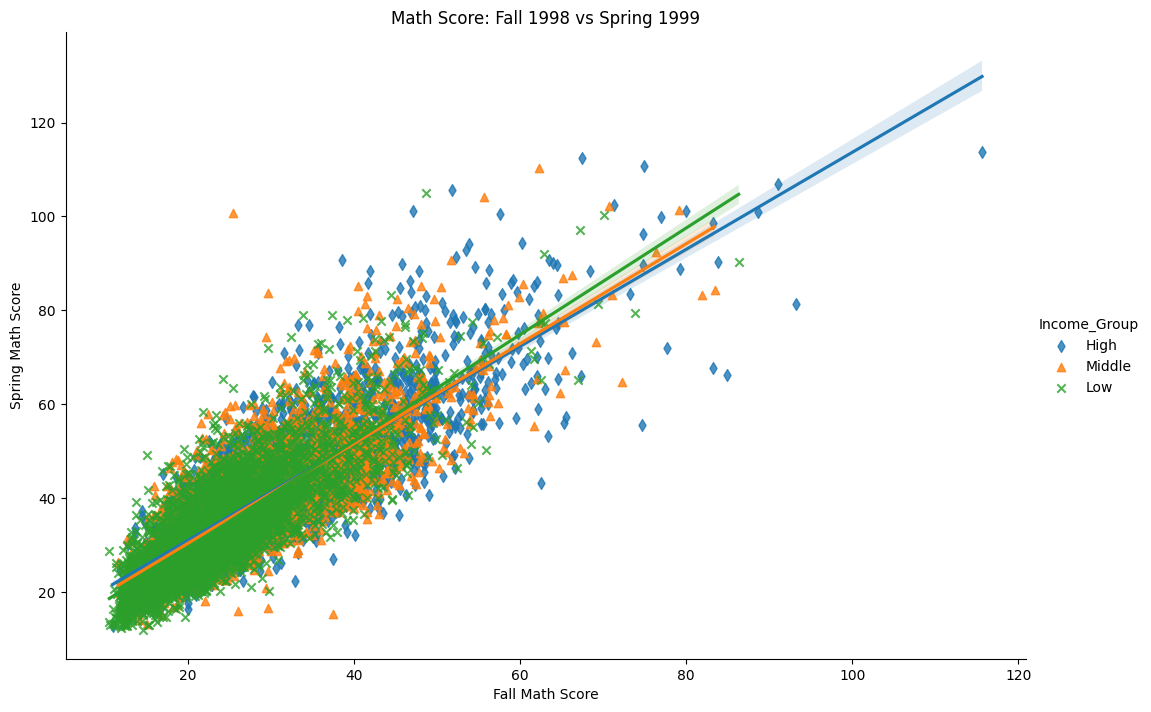

In [63]:
#create a scatterplot of fall math scores vs spring math scores for each income group
sns.lmplot(x = 'Fall_Math_Score', y = "Spring_Math_Score", hue = "Income_Group", height = 7, aspect = 1.5,
           data = scores_data, markers = ['d', '^', 'x']) #(reference 1)

#set plot title
plt.title('Math Score: Fall 1998 vs Spring 1999')

#set x-axis label
plt.xlabel('Fall Math Score')
#set y-axis label
plt.ylabel('Spring Math Score')

plt.show()

#References:
#seaborn.lmport (n.d.) Seaborn. https://seaborn.pydata.org/generated/seaborn.lmplot.html

In [64]:
#perform one-way ANCOVA with Spring_Math_Score as the dependent variable, Fall_Math_Score as the covariate, and Income_Group as the categorical independent variable
ancova(data = scores_data, dv = 'Spring_Math_Score', covar = 'Fall_Math_Score', between = 'Income_Group')

,Source,SS,DF,F,p-unc,np2
0,Income_Group,1.712758e+03,2,18.523585,9.284861e-09,0.003096
1,Fall_Math_Score,1.026489e+06,1,22203.081238,0.000000e+00,0.650505
2,Residual,5.514994e+05,11929,NaN,NaN,NaN


In [65]:
#Fit ANCOVA model with interaction term for math scores
math_model = sm.formula.ols('Spring_Math_Score ~ Income_Group * Fall_Math_Score', data = scores_data).fit()
#print the summary of the model
print(math_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Spring_Math_Score   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     5103.
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:41:06   Log-Likelihood:                -39786.
No. Observations:               11933   AIC:                         7.958e+04
Df Residuals:                   11927   BIC:                         7.963e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [66]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test

#conduct Shapiro-Wilk test to check if the residuals are normally distributed
t_stat, p_value = stats.shapiro(math_model.resid)

#print the test statistic and p-value
print("test statistic = " + str(t_stat))
print("p-value = " + str(p_value))

test statistic = 0.9651376605033875
p-value = 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [67]:
#assumption 2: variances are homogenous
#conduct Levene's test
res = stat()
res.levene(df = scores_data, res_var = 'Spring_Math_Score', xfac_var = 'Income_Group')
res.levene_summary

,Parameter,Value
0,Test statistics (W),18.8999
1,Degrees of freedom (Df),2.0000
2,p value,0.0000
